<a href="https://colab.research.google.com/github/MehrdadJannesar/CNN_AdaBoost/blob/master/Keras_dAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers, optimizers, losses
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

epochs = 10
batch_size = 128

Using TensorFlow backend.


In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


#Create Noise On Data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# x_train_noisy = np.clip(x_train_noisy, 0., 1.)
# x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [26]:
input_img = Input(shape=(784,))


encoded_Layer_1 = Dense(256, activation='relu')(input_img)
encoded_Layer_2 = Dense(128, activation='relu')(encoded_Layer_1)
encoded_Layer_3 = Dense(64, activation='relu')(encoded_Layer_2)
# encoded_Layer_4 = Dense(32, activation='relu')(encoded_Layer_3)


# decoded_Layer_1 = Dense(32, activation='relu')(encoded_Layer_4)
decoded_Layer_2 = Dense(64, activation='relu')(encoded_Layer_3)
decoded_Layer_3 = Dense(128, activation='relu')(decoded_Layer_2)
decoded_Layer_4 = Dense(256, activation='relu')(decoded_Layer_3)
out_put_decoded = Dense(784, activation='sigmoid')(decoded_Layer_4)

autoencoder = Model(input_img, out_put_decoded)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_91 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_92 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_93 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_94 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_95 (Dense)             (None, 256)               330

In [27]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2030 - val_loss: 0.1509
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1418 - val_loss: 0.1341
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1292 - val_loss: 0.1267
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1221 - val_loss: 0.1218
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1179 - val_loss: 0.1189
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1148 - val_loss: 0.1171
Epoch 7/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.1125 - val_loss: 0.1161
Epoch 8/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1108 - val_loss: 0.1156
Epoch 9/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1093 - val_loss: 0.1154
Epoch

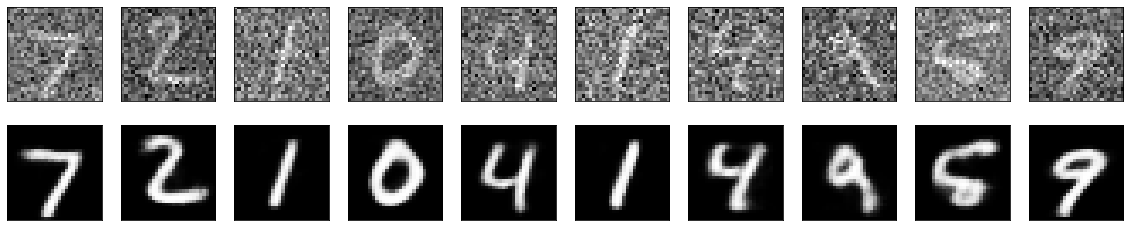

In [28]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()